## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing the heberman file to jupyter name as data 

In [2]:
# Title: Haberman's Survival Data

# Sources:
# (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
# (b) Date: March 4, 1999

# Past Usage:

# Haberman, S. J. (1976). Generalized Residuals for Log-Linear
# Models, Proceedings of the 9th International Biometrics
# Conference, Boston, pp. 104-122.
# Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
# Graphical Models for Assessing Logistic Regression Models (with
# discussion), Journal of the American Statistical Association 79:
# 61-83.
# Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
# Department of Statistics, University of Wisconsin, Madison, WI.
# Relevant Information:
# The dataset contains cases from a study that was conducted between
# 1958 and 1970 at the University of Chicago's Billings Hospital on
# the survival of patients who had undergone surgery for breast
# cancer.

# Number of Instances: 306

In [3]:
data = pd.read_csv("haberman.csv")

In [4]:
# Attribute Information:

# Age of patient at time of operation (numerical)
# Patient's year of operation (year - 1900, numerical)
# Number of positive axillary nodes detected (numerical)
# Survival status (class attribute)
# 1 = the patient survived 5 years or longer
# 2 = the patient died within 5 year
# Missing Attribute Values: None

In [5]:
#The data is about of the cancer patient between 1958 to 1970

In [6]:
data

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [7]:
data.columns= ["Age", "OP_Year","axil_nodes","Surv_status"]

## Checking out the data 

In [8]:
data.head(10)

,Age,OP_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [9]:
data.describe()

,Age,OP_Year,axil_nodes,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [10]:
data.head(10)

,Age,OP_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          305 non-null    int64
 1   OP_Year      305 non-null    int64
 2   axil_nodes   305 non-null    int64
 3   Surv_status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [12]:
data["Surv_status"].value_counts()

Surv_status
1    224
2     81
Name: count, dtype: int64

## Checking the correlation between the features

In [13]:
corr = data.corr()
corr["Surv_status"].sort_values(ascending=False)

Surv_status    1.000000
axil_nodes     0.286191
Age            0.064351
OP_Year       -0.004076
Name: Surv_status, dtype: float64

## converting all 1&2 into yes and no 

yes means the patient survived more than 5 year 
and no means the patient can't survive more than 5 year 

In [14]:
data["Surv_status"] = data["Surv_status"].map({1:"Yes",2:"No"})

In [15]:
data.head(20)

,Age,OP_Year,axil_nodes,Surv_status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes
5,33,60,0,Yes
6,34,59,0,No
7,34,66,9,No
8,34,58,30,Yes
9,34,60,1,Yes


In [16]:
data["Surv_status"].value_counts()

Surv_status
Yes    224
No      81
Name: count, dtype: int64

## Plot the data in histogram plot of matplotlib

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'OP_Year'}>],
       [<Axes: title={'center': 'axil_nodes'}>, <Axes: >]], dtype=object)

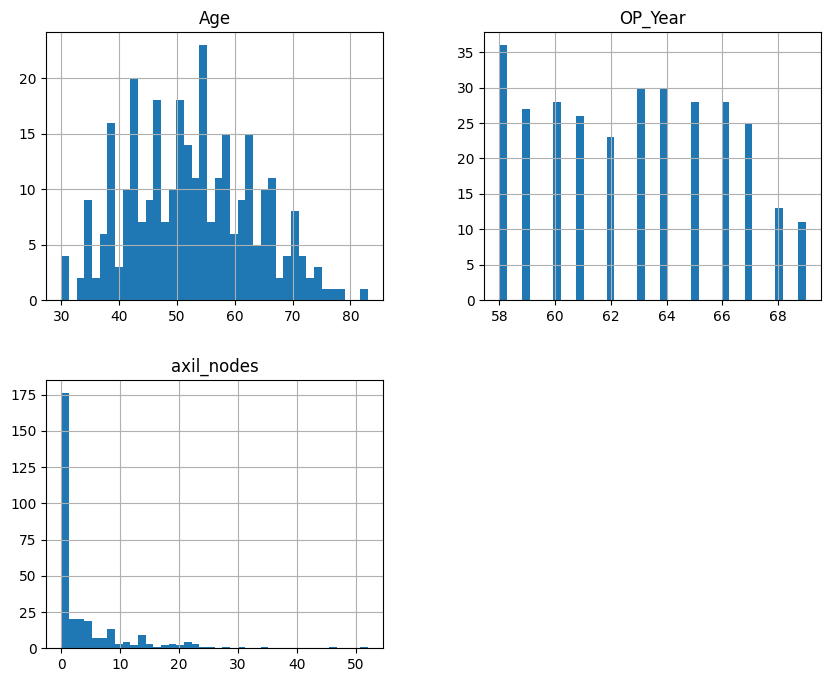

In [17]:
data.hist(bins=40, figsize=(10,8))

here we can see in the histogram plot the patient's of age 54-55 are more than other age .

The younger people between age 30-38 are suffered from this diseas less also the older people up to age 70

<Axes: xlabel='Surv_status', ylabel='count'>

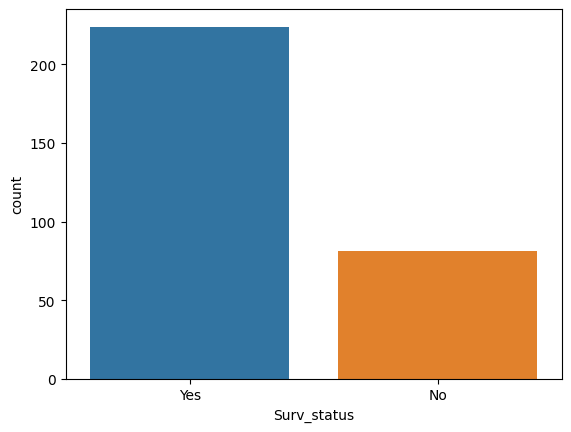

In [18]:
sns.countplot(x = 'Surv_status',data = data)

By the count plot we can see the survival of more than 5 year is more than survival of less than 5 year .

C:\Users\emonp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


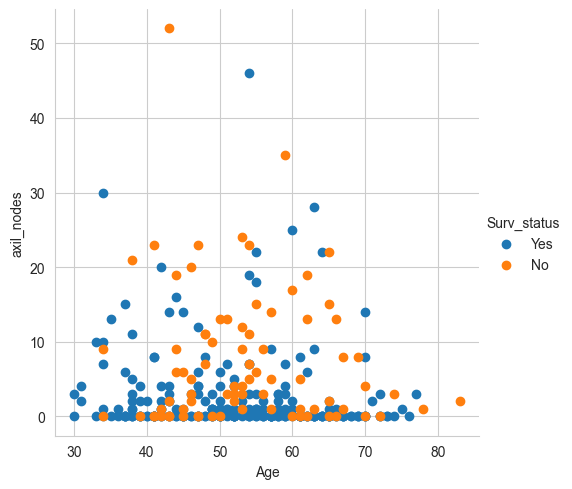

In [19]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Surv_status",height=5) \
.map(plt.scatter, "Age", "axil_nodes").add_legend()
plt.show()

In [20]:
# The scatter plot is for axil_nodes level during the certain age and the survival status .
# The survival status along the axile nodes are positive at the age of 30-38.Also can see that the lower the axile node is 
#the higher the survival status are .It also noticeble that in the age of 39-50 the level of axil nodes age 0 but the survival 
# status is negative also same for 60-67 .


# What is axile node 

In [21]:
#The axillary lymph nodes are in the armpits, near the breasts. This means they are often the first location to which breast cancer spreads if
# it moves beyond the breast tissue. Lymph nodes are small structures inside the body that connect to a network of lymph vessels.

C:\Users\emonp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\emonp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


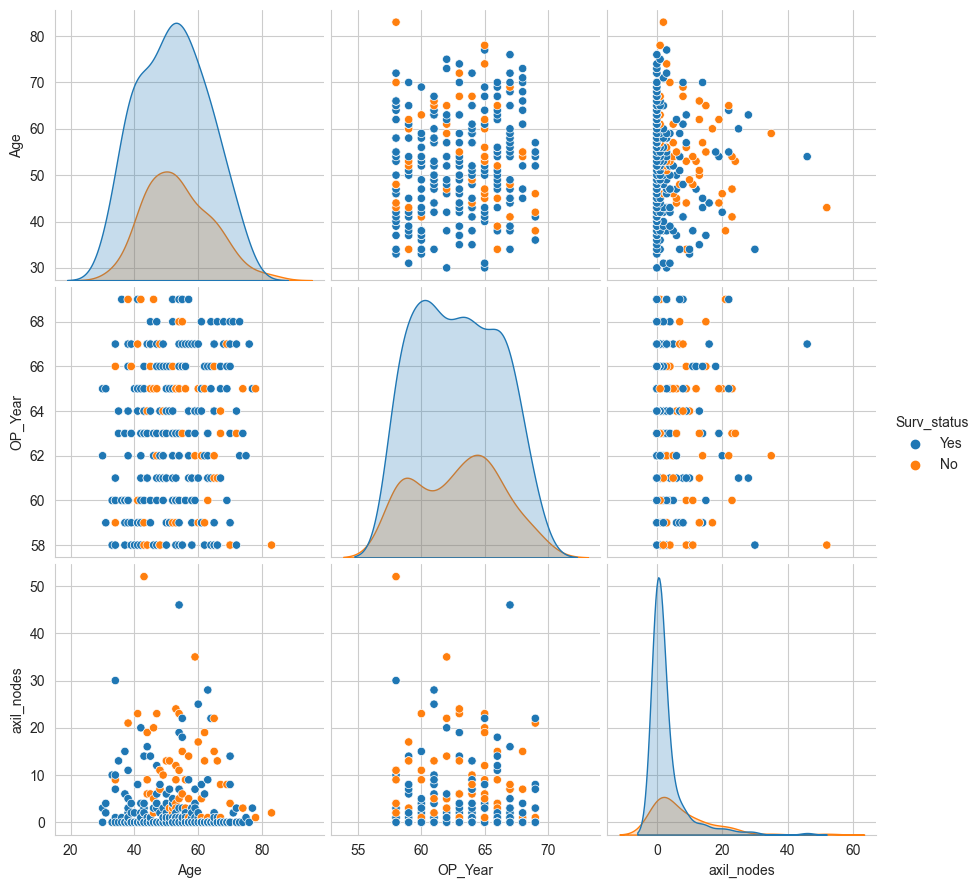

In [22]:
sns.pairplot(data , hue = "Surv_status" , size = 3)
plt.show()

In [23]:
# Here the most important scatter plot is the operational year by the age .
# In the year of 60-64 at 1900s the success rate are higher than other year's . 

C:\Users\emonp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


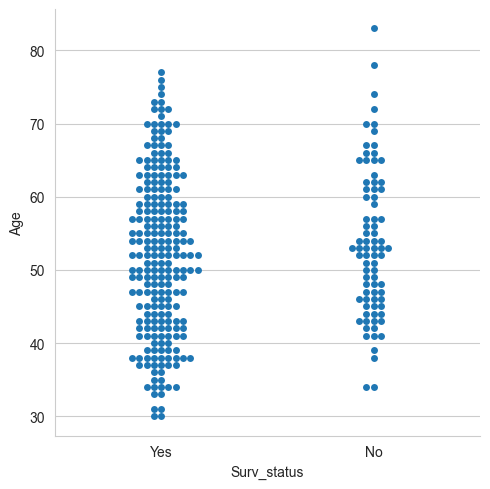

In [24]:
sns.catplot(data=data , x = "Surv_status" ,y = "Age" ,  kind  = "swarm")

C:\Users\emonp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\emonp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\emonp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


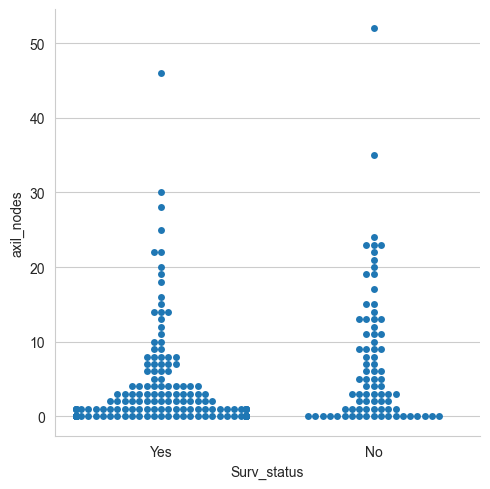

In [25]:
sns.catplot(data = data , x = "Surv_status", y = "axil_nodes" , kind = "swarm")
plt.show()

C:\Users\emonp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


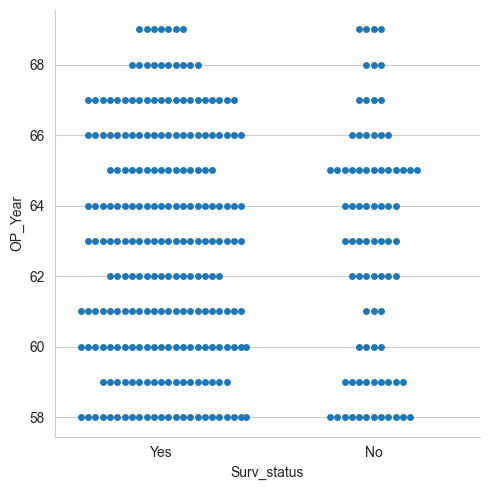

In [26]:
sns.catplot(data = data , x = "Surv_status" , y = "OP_Year", kind= "swarm")
plt.show()

C:\Users\emonp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\emonp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

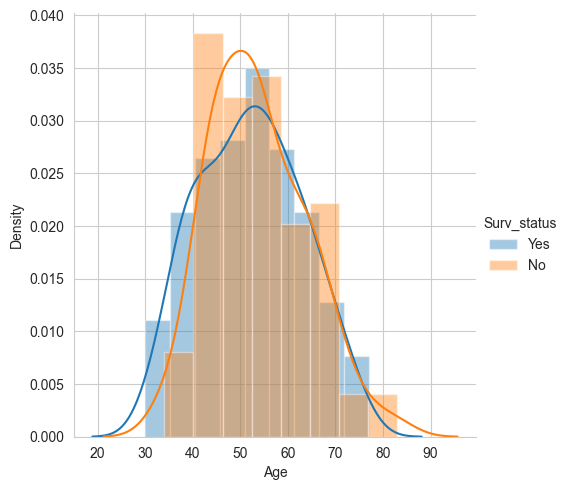

In [27]:
sns.FacetGrid(data, hue="Surv_status", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()


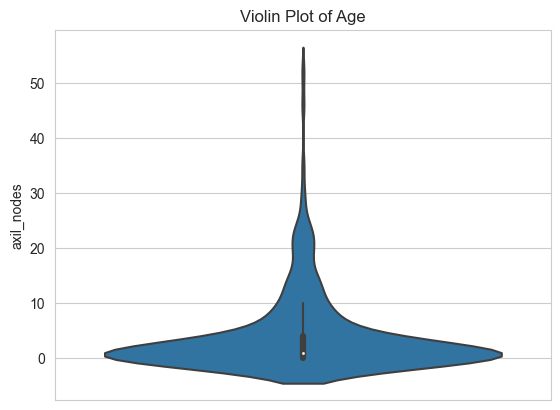

In [28]:
sns.violinplot(y="axil_nodes" ,data=data)
plt.title("Violin Plot of Age")
plt.show()

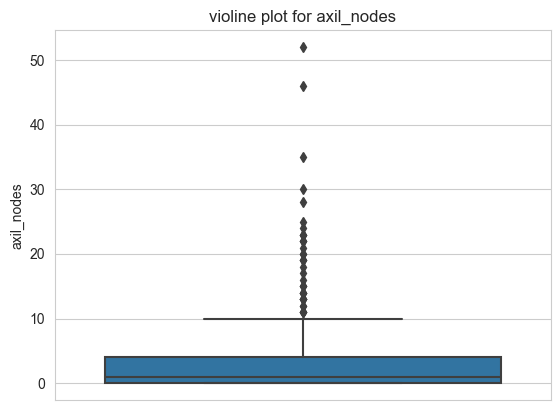

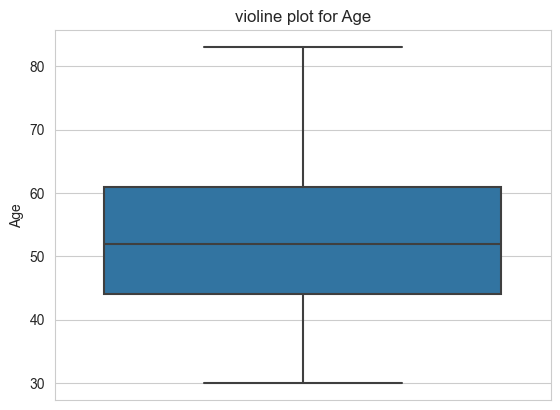

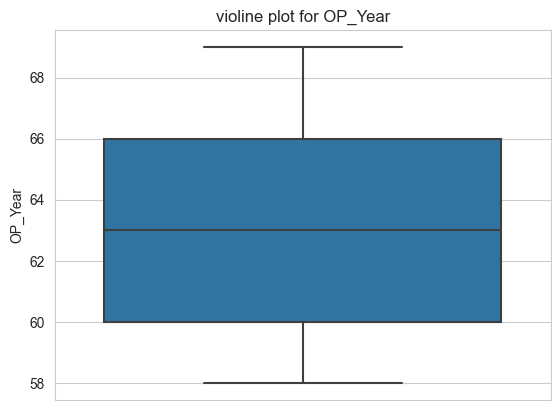

In [29]:
sns.boxplot(y="axil_nodes", data = data)
plt.title("violine plot for axil_nodes")
plt.show()
sns.boxplot(y="Age", data = data)
plt.title("violine plot for Age")
plt.show()
sns.boxplot(y="OP_Year", data = data)
plt.title("violine plot for OP_Year")
plt.show()